In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
PATH = 'vege_data.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,Crop,Nitrogen (N),Phosphorus (P),Potassium (K),Rainfall,pH,Temperature,Humidity
0,Beetroot,119,50,93,679.602594,5.397727,23.847070,89.314519
1,Beetroot,119,45,93,700.270570,5.365436,24.134742,83.461121
2,Beetroot,114,50,97,719.033029,5.405536,21.091247,76.316199
3,Beetroot,111,45,90,642.767471,5.577981,21.643756,76.199789
4,Beetroot,118,41,100,648.949851,5.606427,23.456834,84.045537


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            6400 non-null   object 
 1   Nitrogen (N)    6400 non-null   int64  
 2   Phosphorus (P)  6400 non-null   int64  
 3   Potassium (K)   6400 non-null   int64  
 4   Rainfall        6400 non-null   float64
 5   pH              6400 non-null   float64
 6   Temperature     6400 non-null   float64
 7   Humidity        6400 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 400.1+ KB


In [5]:
df.describe()

,Nitrogen (N),Phosphorus (P),Potassium (K),Rainfall,pH,Temperature,Humidity
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,77.978281,49.730781,65.729062,730.512012,6.129697,22.168052,61.154037
std,29.144664,27.818061,36.636479,451.791228,0.613629,5.908226,11.779046
min,5.000000,5.000000,10.000000,400.060123,4.701759,10.003019,30.023708
25%,57.000000,28.750000,40.000000,531.901391,5.640300,17.580483,52.465450
50%,83.000000,49.000000,57.000000,624.223662,6.319057,22.253594,62.000466
75%,97.000000,64.000000,92.000000,733.445342,6.573855,26.797976,69.406216
max,130.000000,120.000000,150.000000,2998.926708,7.499949,34.983806,89.999689


In [6]:
df.size

51200

In [7]:
df.shape

(6400, 8)

In [8]:
df.columns

Index(['Crop', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)', 'Rainfall',
       'pH', 'Temperature', 'Humidity'],
      dtype='object')

In [9]:
df.isnull().sum()

Crop              0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Rainfall          0
pH                0
Temperature       0
Humidity          0
dtype: int64

In [10]:
df['Crop'].unique()

array(['Beetroot', 'Bitter gourd', 'Bottle gourd', 'Brinjal', 'Cabbage',
       'Capsicum', 'Carrot', 'Cauliflower', 'Chilli', 'Coriander leaves',
       'Corn', 'Cucumber', 'Fava beans', 'French beans', 'Green peas',
       'Ladyfinger', 'Lima beans', 'Pumpkin', 'Radish', 'Ridge gourd',
       'Spinach', 'Sweet potato', 'Tapioca', 'Tomato', 'Lettuce',
       'Bok choy', 'Broccoli', 'Celery', 'Chinese cabbage', 'Kale',
       'Mustard greens', 'Zucchini'], dtype=object)

In [11]:
df['Crop'].value_counts()

Beetroot            200
Bitter gourd        200
Mustard greens      200
Kale                200
Chinese cabbage     200
Celery              200
Broccoli            200
Bok choy            200
Lettuce             200
Tomato              200
Tapioca             200
Sweet potato        200
Spinach             200
Ridge gourd         200
Radish              200
Pumpkin             200
Lima beans          200
Ladyfinger          200
Green peas          200
French beans        200
Fava beans          200
Cucumber            200
Corn                200
Coriander leaves    200
Chilli              200
Cauliflower         200
Carrot              200
Capsicum            200
Cabbage             200
Brinjal             200
Bottle gourd        200
Zucchini            200
Name: Crop, dtype: int64

In [12]:
df.dtypes

Crop               object
Nitrogen (N)        int64
Phosphorus (P)      int64
Potassium (K)       int64
Rainfall          float64
pH                float64
Temperature       float64
Humidity          float64
dtype: object

<AxesSubplot:>

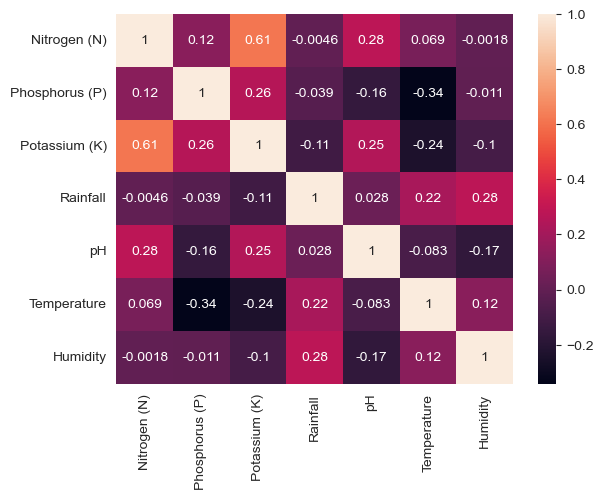

In [13]:
sns.heatmap(df.corr(),annot=True)

#### Seperating features and target label

In [14]:
features = df[['Nitrogen (N)', 'Phosphorus (P)','Potassium (K)','Rainfall', 'pH', 'Temperature', 'Humidity']]
target = df['Crop']
labels = df['Crop']

In [15]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.09375
                  precision    recall  f1-score   support

        Beetroot       0.97      0.90      0.94        42
    Bitter gourd       1.00      1.00      1.00        44
        Bok choy       1.00      0.95      0.97        39
    Bottle gourd       0.45      1.00      0.62        33
         Brinjal       1.00      1.00      1.00        39
        Broccoli       0.00      0.00      0.00        41
         Cabbage       0.98      1.00      0.99        42
        Capsicum       1.00      1.00      1.00        45
          Carrot       0.89      1.00      0.94        48
     Cauliflower       0.50      1.00      0.67        40
          Celery       0.94      1.00      0.97        34
          Chilli       1.00      1.00      1.00        39
 Chinese cabbage       1.00      0.98      0.99        42
Coriander leaves       1.00      1.00      1.00        40
            Corn       1.00      0.84      0.92        45
        Cucumber       1.00     

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [20]:
score

array([0.91171875, 0.9125    , 0.9140625 , 0.91484375, 0.8953125 ])

##### Saving trained Decision Tree model

In [21]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = './model/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

## Guassian Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.99609375
                  precision    recall  f1-score   support

        Beetroot       1.00      1.00      1.00        42
    Bitter gourd       1.00      1.00      1.00        44
        Bok choy       0.97      1.00      0.99        39
    Bottle gourd       1.00      1.00      1.00        33
         Brinjal       1.00      1.00      1.00        39
        Broccoli       0.98      0.98      0.98        41
         Cabbage       1.00      1.00      1.00        42
        Capsicum       1.00      1.00      1.00        45
          Carrot       1.00      1.00      1.00        48
     Cauliflower       0.97      0.97      0.97        40
          Celery       1.00      0.97      0.99        34
          Chilli       1.00      1.00      1.00        39
 Chinese cabbage       1.00      1.00      1.00        42
Coriander leaves       1.00      1.00      1.00        40
            Corn       1.00      1.00      1.00        45
        Cucumber       1.00     

In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.9953125 , 0.99375   , 0.99453125, 0.98984375, 0.99375   ])

##### Saving trained Guassian Naive Bayes model

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = './model/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

## Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.07734375
                  precision    recall  f1-score   support

        Beetroot       1.00      0.10      0.17        42
    Bitter gourd       0.00      0.00      0.00        44
        Bok choy       1.00      0.10      0.19        39
    Bottle gourd       1.00      0.09      0.17        33
         Brinjal       1.00      0.03      0.05        39
        Broccoli       0.75      0.07      0.13        41
         Cabbage       1.00      0.02      0.05        42
        Capsicum       1.00      0.02      0.04        45
          Carrot       1.00      0.02      0.04        48
     Cauliflower       1.00      0.05      0.10        40
          Celery       1.00      0.15      0.26        34
          Chilli       0.00      0.00      0.00        39
 Chinese cabbage       1.00      0.02      0.05        42
Coriander leaves       1.00      0.12      0.22        40
            Corn       1.00      0.04      0.09        45
        Cucumber       1.00      0.07   

In [26]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.2015625 , 0.2296875 , 0.2453125 , 0.20390625, 0.234375  ])

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.88359375
                  precision    recall  f1-score   support

        Beetroot       0.87      0.98      0.92        42
    Bitter gourd       1.00      1.00      1.00        44
        Bok choy       0.80      0.92      0.86        39
    Bottle gourd       0.97      0.97      0.97        33
         Brinjal       0.97      0.90      0.93        39
        Broccoli       0.78      0.78      0.78        41
         Cabbage       1.00      1.00      1.00        42
        Capsicum       0.88      0.78      0.82        45
          Carrot       0.95      0.85      0.90        48
     Cauliflower       0.74      0.93      0.82        40
          Celery       0.84      0.76      0.80        34
          Chilli       0.76      0.90      0.82        39
 Chinese cabbage       0.81      0.71      0.76        42
Coriander leaves       1.00      0.93      0.96        40
            Corn       0.93      0.93      0.93        45
        Cucumber       0

In [28]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.8859375 , 0.8734375 , 0.8734375 , 0.87734375, 0.86953125])

##### Saving trained Logistic Regression model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = './model/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9921875
                  precision    recall  f1-score   support

        Beetroot       1.00      1.00      1.00        42
    Bitter gourd       1.00      1.00      1.00        44
        Bok choy       1.00      1.00      1.00        39
    Bottle gourd       1.00      1.00      1.00        33
         Brinjal       1.00      1.00      1.00        39
        Broccoli       0.95      0.95      0.95        41
         Cabbage       1.00      1.00      1.00        42
        Capsicum       1.00      1.00      1.00        45
          Carrot       1.00      1.00      1.00        48
     Cauliflower       0.95      0.95      0.95        40
          Celery       1.00      1.00      1.00        34
          Chilli       1.00      1.00      1.00        39
 Chinese cabbage       1.00      1.00      1.00        42
Coriander leaves       1.00      1.00      1.00        40
            Corn       1.00      1.00      1.00        45
        Cucumber       1.00      1.00     

In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99609375, 0.99375   , 0.99375   , 0.99375   , 0.99453125])

##### Saving trained Random Forest model

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = './model/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## XGBoost

In [33]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

XB = xgb.XGBClassifier()

# Encode the target variable
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Fit the model on the encoded target variable
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the trained model
predicted_values = XB.predict(Xtest)

# Decode the predicted values
predicted_labels = label_encoder.inverse_transform(predicted_values)

# Calculate accuracy
x = metrics.accuracy_score(Ytest, predicted_labels)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

# Print classification report
print(classification_report(Ytest, predicted_labels))

XGBoost's Accuracy is:  0.98984375
                  precision    recall  f1-score   support

        Beetroot       1.00      1.00      1.00        42
    Bitter gourd       1.00      1.00      1.00        44
        Bok choy       1.00      1.00      1.00        39
    Bottle gourd       1.00      1.00      1.00        33
         Brinjal       0.97      1.00      0.99        39
        Broccoli       0.95      0.95      0.95        41
         Cabbage       1.00      1.00      1.00        42
        Capsicum       1.00      1.00      1.00        45
          Carrot       1.00      1.00      1.00        48
     Cauliflower       0.95      0.97      0.96        40
          Celery       1.00      1.00      1.00        34
          Chilli       1.00      1.00      1.00        39
 Chinese cabbage       1.00      1.00      1.00        42
Coriander leaves       1.00      1.00      1.00        40
            Corn       1.00      1.00      1.00        45
        Cucumber       1.00      1.0

In [34]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Cross validation score (XGBoost)
score = cross_val_score(XB, features, target_encoded, cv=5)
score

array([0.9953125 , 0.99296875, 0.99375   , 0.990625  , 0.99375   ])

##### Saving trained XGBoost model

In [35]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = './model/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

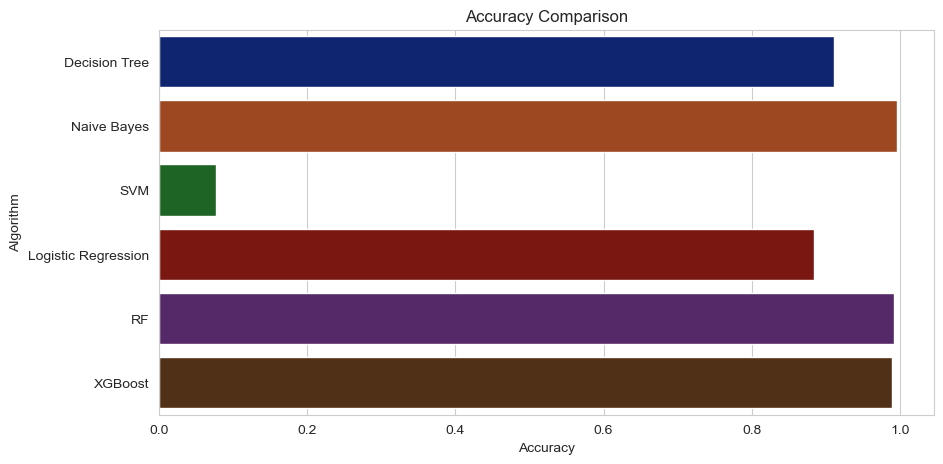

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [37]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9109375
Naive Bayes --> 0.99609375
SVM --> 0.07734375
Logistic Regression --> 0.88359375
RF --> 0.9921875
XGBoost --> 0.98984375


In [59]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the two models
model1 = RandomForestClassifier()
model2 = GaussianNB()

# Create a voting classifier
vc = VotingClassifier(estimators=[('rf', model1),('nb', model2)], voting='soft')

# Train the voting classifier
vc.fit(Xtrain, Ytrain)

# Make predictions
y_pred = vc.predict(Xtest)

# Evaluate the predictions
print(accuracy_score(Ytest, y_pred))

0.99296875


## Making a prediction

In [57]:
data = np.array([[119,55,90,679.602594,5.397727,23.84707,89.314519]])
prediction = RF.predict(data)
print(prediction)

['Beetroot']


In [58]:
data = np.array([[119,55,90,690,5,23.84707,89.314519]])
prediction = NaiveBayes.predict(data)
print(prediction)

['Beetroot']


In [53]:
data = np.array([[119,50,93,679.602594,5.397727,23.84707,89.314519]])
prediction = vc.predict(data)
print(prediction)

['Beetroot']


In [54]:
data = np.array([[119,50,93,679.602594,5.397727,23.84707,89.314519]])
prediction = DecisionTree.predict(data)
print(prediction)

['Beetroot']


In [55]:
data = np.array([[119,50,93,679.602594,5.397727,23.84707,89.314519]])
prediction = LogReg.predict(data)
print(prediction)

['Beetroot']


In [56]:
data = np.array([[119,50,93,679.602594,5.397727,23.84707,89.314519]])
prediction = SVM.predict(data)
print(prediction)

['Beetroot']
